In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
from datetime import datetime
import plotly.express as px
import itertools
from pylab import rcParams
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math


In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
ls'/content/gdrive/My Drive/Thesis'

dataframe_dma_flow_1D.csv       dataframe_flow_variable_60min.csv
dataframe_dma_flow_60min.csv    DMA_225.csv
dataframe_flow_1D.csv           DMA_468.csv
dataframe_flow_variable_1D.csv  persistence_results.pkl


In [4]:
data = pd.read_csv("/content/gdrive/My Drive/Thesis/DMA_225.csv")
data['Date-time'] = pd.to_datetime(data['Date-time'], dayfirst=True, errors='coerce')

In [5]:
data.rename( columns={'Flow':'DMA_225','Date-time':'Date_time'}, inplace=True )
data_DMA225 = data[['Date_time','DMA_225']]

In [6]:
figure = px.line(data_DMA225,x="Date_time",y="DMA_225",title="DMA_225 with slider")
figure.update_xaxes(rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="12m",
                     step="month",
                     stepmode="backward"),
                dict(count=2,
                     label="8m",
                     step="month",
                     stepmode="backward"),
                dict(count=3,
                     label="4m",
                     step="month",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        )
    )
figure.show()

In [7]:
data_DMA225_indexed = data_DMA225.set_index('Date_time')
hourly_data = data_DMA225_indexed.resample('h').sum()

In [8]:
# Baseline model : Persistence model

# Making a df
Original = hourly_data["DMA_225"].to_frame().rename(columns = {"DMA_225": "Original" })
Forecast  = hourly_data["DMA_225"].to_frame().shift(1).rename(columns = {"DMA_225": "Forecast" })
baseline = pd.concat([Original,Forecast],axis=1)
final = baseline[1:]#there is no prediction for first row due to shifting.
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(final.Original, final.Forecast))
rmse = round(rmse, 3)
print (" The root mean square value on dataset: ",rmse)

 The root mean square value on dataset:  4.425


<Figure size 1584x720 with 0 Axes>

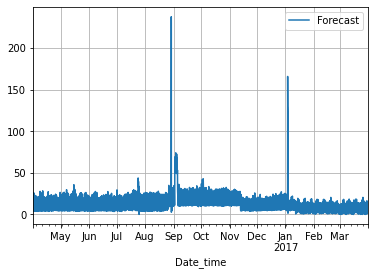

<Figure size 1584x720 with 0 Axes>

In [9]:
baseline_model = final[['Forecast']]
baseline_model.plot(grid=True)

plt.figure(figsize=(22,10))

In [10]:
final.head(3)

,Original,Forecast
Date_time,,
2016-04-01 01:00:00,4.555,5.443
2016-04-01 02:00:00,4.333,4.555
2016-04-01 03:00:00,4.333,4.333


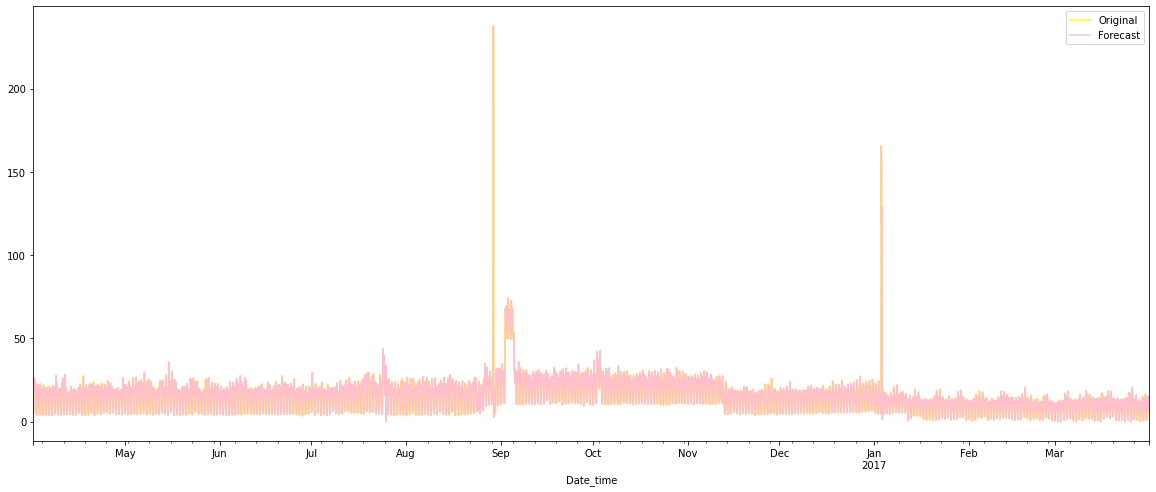

In [11]:
#final[['Original', 'Forecast']].plot(figfigsizesize(16,6), color=['green', 'brown'])
final.plot(figsize=(20,8), color=['yellow', 'pink'])

In [12]:
baseline_graph = final[-1059:]
rmse1 = np.sqrt(mean_squared_error(baseline_graph.Original, baseline_graph.Forecast))
rmse1 = round(rmse1, 3)
print (" The root mean square value on dataset using baseline model: ",rmse1)


 The root mean square value on dataset using baseline model:  2.156


In [13]:
bg = baseline_graph.reset_index()
bg.head(2)

,Date_time,Original,Forecast
0,2017-02-15 21:00:00,7.334,8.889
1,2017-02-15 22:00:00,7.111,7.334


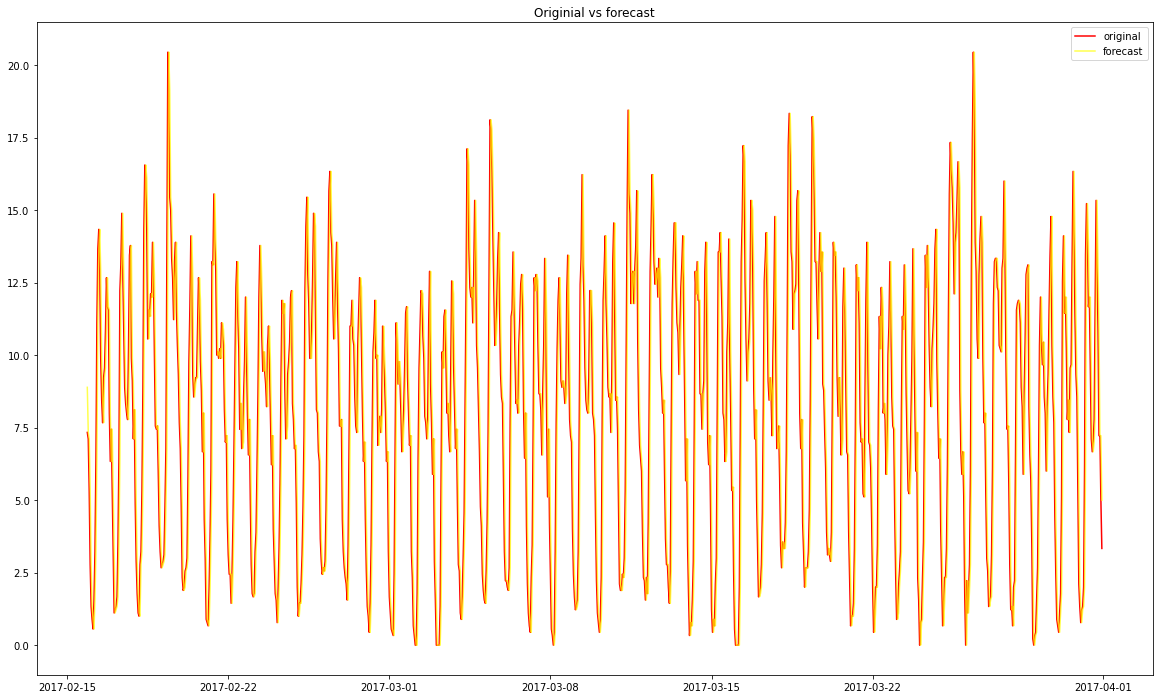

In [14]:
# Plotting original and predicted graph:
plt.figure(figsize=(20, 12))
plt.plot(bg.Date_time, bg.Original, color='red', label='original')
plt.plot(bg.Date_time, bg.Forecast, color='yellow', label='forecast', alpha=0.7)
plt.title('Originial vs forecast')
plt.legend()
plt.show()